## 1.Loading the dataset and getting information for better understanding

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('BankChurners.csv')

# Basic information and statistics
df.info()
print("\nBasic Statistics:")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [47]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## 2.Checking missing values

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                

## since there are no missing values so no need to do anything

## 3.outlier Detection

In [10]:
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                  'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                  'Contacts_Count_12_mon', 'Credit_Limit', 
                  'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                  'Avg_Utilization_Ratio']

## BOX plot technique to detect outliers

In [ ]:
def detect_outliers(df, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_dict[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(df) * 100
        }
    return outliers_dict


outliers = detect_outliers(df, numerical_cols)
print("Outliers Analysis:")
for col, stats in outliers.items():
    print(f"{col}: {stats['count']} outliers ({stats['percentage']:.2f}%)")


from scipy.stats.mstats import winsorize

def winsorize_column(series):
    return winsorize(series, limits=[0.05, 0.05])

for col in numerical_cols:
    df[col] = winsorize_column(df[col])

Outliers Analysis:
Customer_Age: 2 outliers (0.02%)
Dependent_count: 0 outliers (0.00%)
Months_on_book: 386 outliers (3.81%)
Total_Relationship_Count: 0 outliers (0.00%)
Months_Inactive_12_mon: 331 outliers (3.27%)
Contacts_Count_12_mon: 629 outliers (6.21%)
Credit_Limit: 984 outliers (9.72%)
Total_Revolving_Bal: 0 outliers (0.00%)
Avg_Open_To_Buy: 963 outliers (9.51%)
Total_Amt_Chng_Q4_Q1: 396 outliers (3.91%)
Total_Trans_Amt: 896 outliers (8.85%)
Total_Trans_Ct: 2 outliers (0.02%)
Total_Ct_Chng_Q4_Q1: 394 outliers (3.89%)
Avg_Utilization_Ratio: 0 outliers (0.00%)


## Encoding categorical variabels and scaling numerical for better convergence

In [ ]:
# Create new features
df['Total_Spend'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
df['Utilization_to_Income_Ratio'] = df['Avg_Utilization_Ratio'] / df['Income_Category'].map({
    'Less than $40K': 1, 
    '$40K - $60K': 2, 
    '$60K - $80K': 3, 
    '$80K - $120K': 4, 
    '$120K +': 5
})

categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Graphical representation

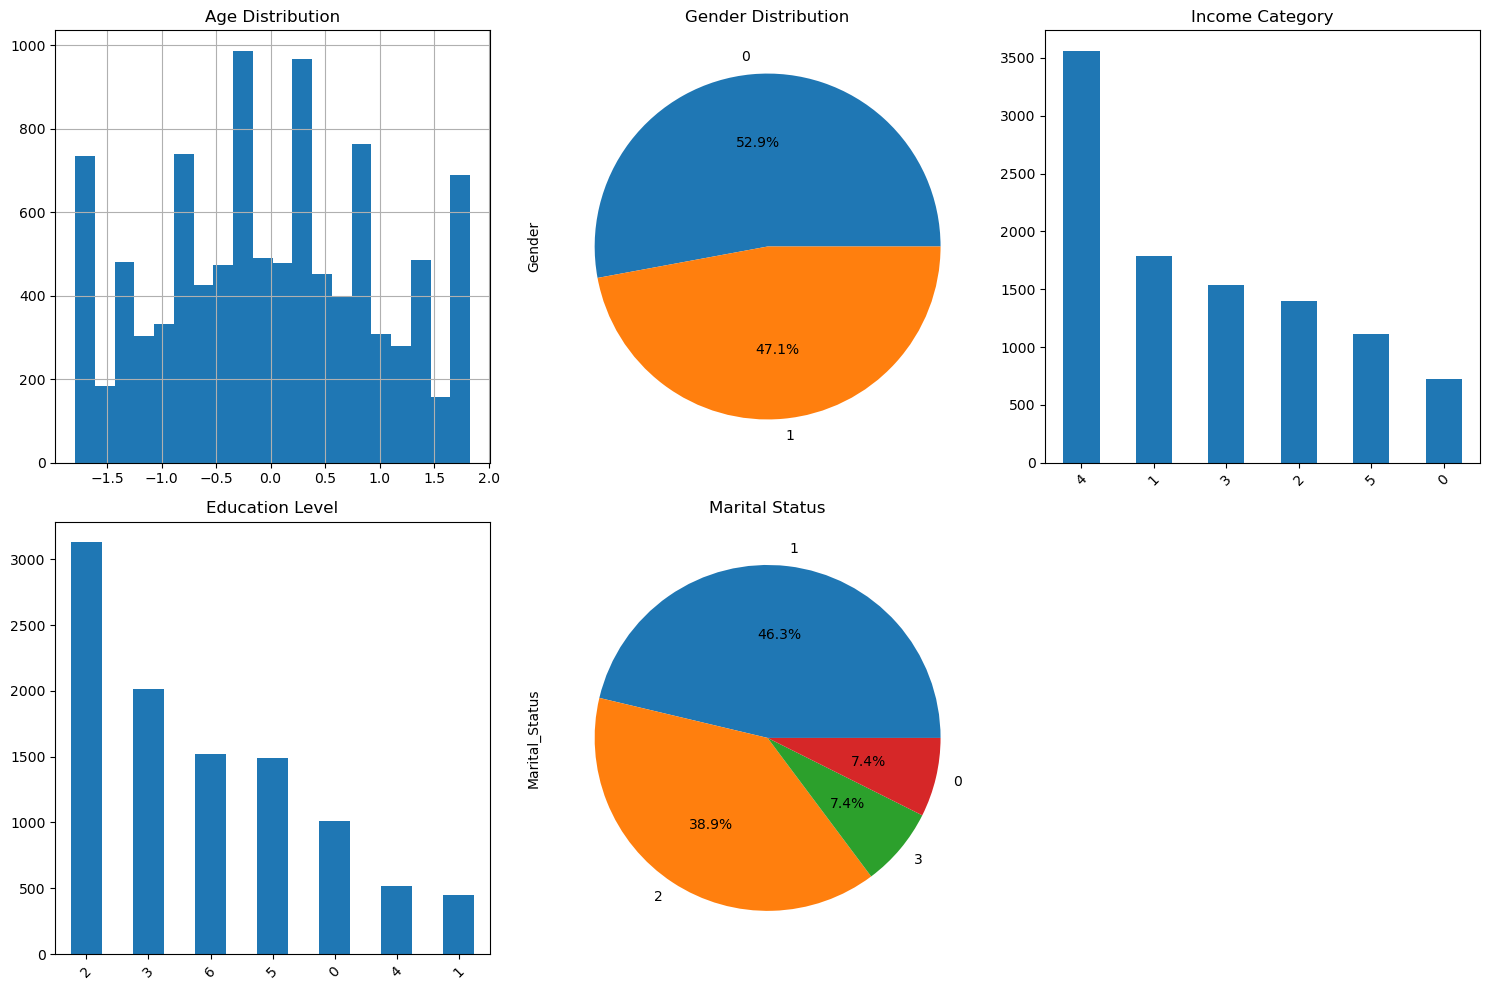

In [20]:
# 1. Demographics Distribution
plt.figure(figsize=(15,10))

# Age Distribution
plt.subplot(2,3,1)
df['Customer_Age'].hist(bins=20)
plt.title('Age Distribution')

# Gender Distribution
plt.subplot(2,3,2)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

# Income Category Distribution
plt.subplot(2,3,3)
df['Income_Category'].value_counts().plot(kind='bar')
plt.title('Income Category')
plt.xticks(rotation=45)

# Education Level Distribution
plt.subplot(2,3,4)
df['Education_Level'].value_counts().plot(kind='bar')
plt.title('Education Level')
plt.xticks(rotation=45)

# Marital Status Distribution
plt.subplot(2,3,5)
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status')

plt.tight_layout()
plt.show()

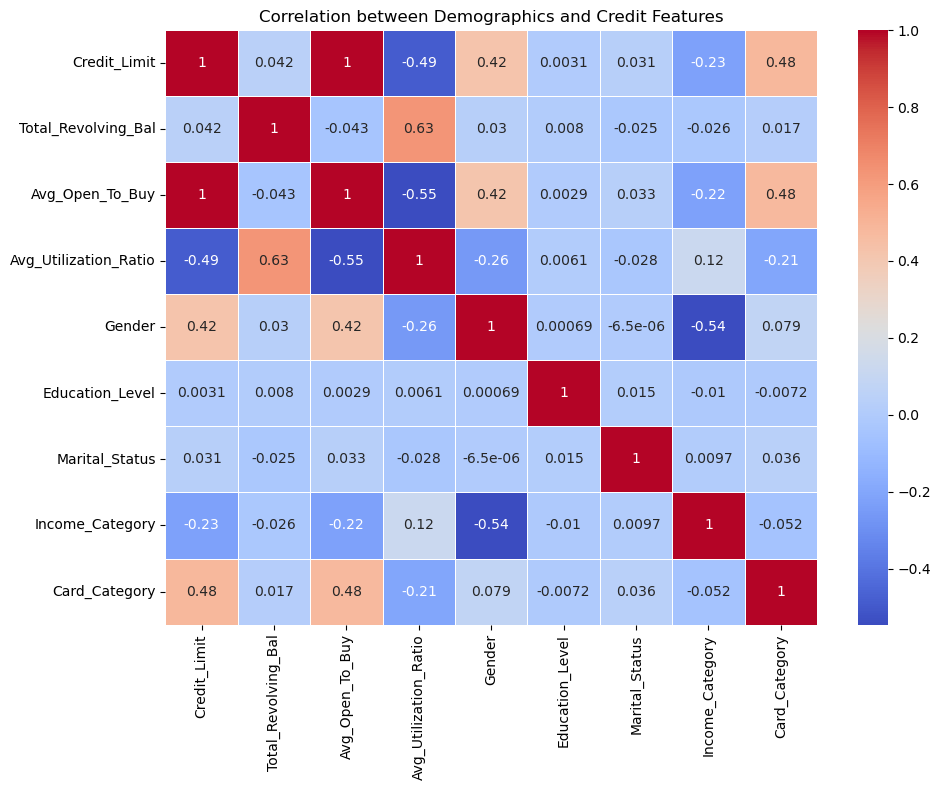

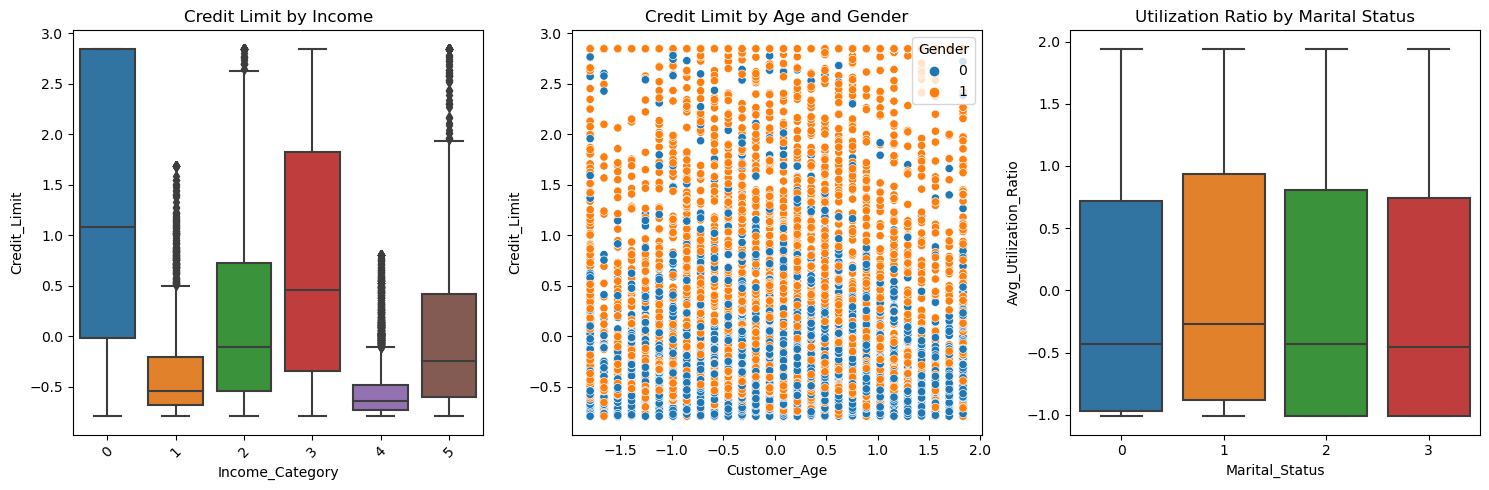

In [ ]:
credit_features = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']

plt.figure(figsize=(10,8))
correlation_matrix = df[credit_features + categorical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Demographics and Credit Features')
plt.tight_layout()
plt.show()


# Credit Limit by Income and Age
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Income_Category', y='Credit_Limit', data=df)
plt.title('Credit Limit by Income')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.scatterplot(x='Customer_Age', y='Credit_Limit', hue='Gender', data=df)
plt.title('Credit Limit by Age and Gender')

plt.subplot(1,3,3)
sns.boxplot(x='Marital_Status', y='Avg_Utilization_Ratio', data=df)
plt.title('Utilization Ratio by Marital Status')

plt.tight_layout()
plt.show()


In [49]:

# Statistical Summary
print("\nCredit Usage Statistics by Demographics:")
demographics_stats = df.groupby('Income_Category')[credit_features].agg(['mean', 'median'])
demographics_stats


Credit Usage Statistics by Demographics:


Credit_Limit          Total_Revolving_Bal          \
                         mean   median                mean  median   
Income_Category                                                      
$120K +          19717.322558  18442.0         1222.196699  1344.0   
$40K - $60K       5462.259832   3682.0         1171.994413  1303.5   
$60K - $80K      10758.772967   7660.0         1154.993581  1255.0   
$80K - $120K     15809.890945  12830.0         1206.727036  1324.0   
Less than $40K    3754.404521   2766.0         1145.136759  1247.0   
Unknown           9516.582464   6380.0         1115.064748  1243.0   

                Avg_Open_To_Buy          Avg_Utilization_Ratio          
                           mean   median                  mean  median  
Income_Category                                                         
$120K +            18495.125860  17117.0              0.125307  0.0620  
$40K - $60K         4290.265419   2580.5              0.316561  0.2590  
$60K - $80K         9603.779387   6418.5              0.206075  0.1135  
$80K - $120K       14603.163909  11606.0              0.161664  0.0750  
Less than $40K      2609.267762   1478.0              0.377280  0.3900  
Unknown             8401.517716   5464.5              0.220810  0.1250

## Applying K-means clustering

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Prepare features for clustering
clustering_features = [
    'Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 
    'Total_Trans_Amt', 'Avg_Utilization_Ratio', 
    'Months_Inactive_12_mon', 'Total_Relationship_Count'
]

# Prepare data for clustering
X = df[clustering_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [29]:
def find_optimal_clusters(data):
    max_clusters = 10
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Plotting
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    
    plt.subplot(1,2,2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()

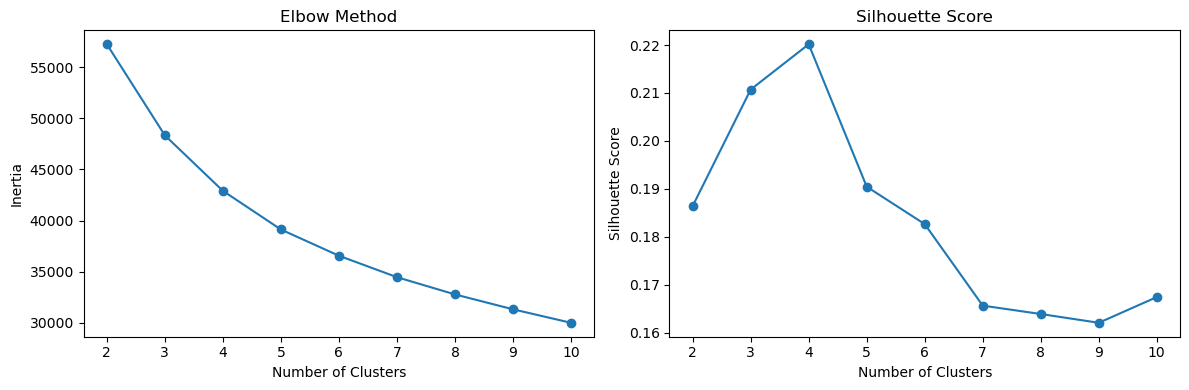

In [44]:
find_optimal_clusters(X_scaled)

# Perform K-Means Clustering (choose optimal k based on the plot)
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



In [31]:
def analyze_clusters(df):
    cluster_summary = df.groupby('Cluster')[clustering_features].mean()
    print("Cluster Centroids:")
    print(cluster_summary)
    
    # Demographic composition of each cluster
    print("\nCluster Demographic Composition:")
    demographic_features = ['Gender', 'Income_Category', 'Education_Level', 'Marital_Status']
    for feature in demographic_features:
        print(f"\n{feature} Distribution:")
        print(df.groupby('Cluster')[feature].value_counts(normalize=True).unstack())
    
    # Visualization of clusters
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    sns.scatterplot(data=df, x='Credit_Limit', y='Total_Trans_Amt', hue='Cluster', palette='viridis')
    plt.title('Clusters: Credit Limit vs Total Transaction Amount')
    
    plt.subplot(1,3,2)
    sns.scatterplot(data=df, x='Customer_Age', y='Avg_Utilization_Ratio', hue='Cluster', palette='viridis')
    plt.title('Clusters: Age vs Utilization Ratio')
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df, x='Cluster', y='Total_Revolving_Bal', palette='viridis')
    plt.title('Revolving Balance by Cluster')
    
    plt.tight_layout()
    plt.show()

# clustering analysis

Cluster Centroids:
         Customer_Age  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  \
Cluster                                                                     
0            0.021881      1.657148             0.194905        -0.337620   
1            0.006208     -0.329340            -1.115296        -0.302632   
2           -0.109159      0.594646             0.287849         2.361709   
3            0.016222     -0.534833             0.630628        -0.283484   

         Avg_Utilization_Ratio  Months_Inactive_12_mon  \
Cluster                                                  
0                    -0.760017               -0.036179   
1                    -0.826576                0.121163   
2                    -0.359153               -0.145107   
3                     0.949543               -0.033186   

         Total_Relationship_Count  
Cluster                            
0                        0.223582  
1                        0.029639  
2                       -

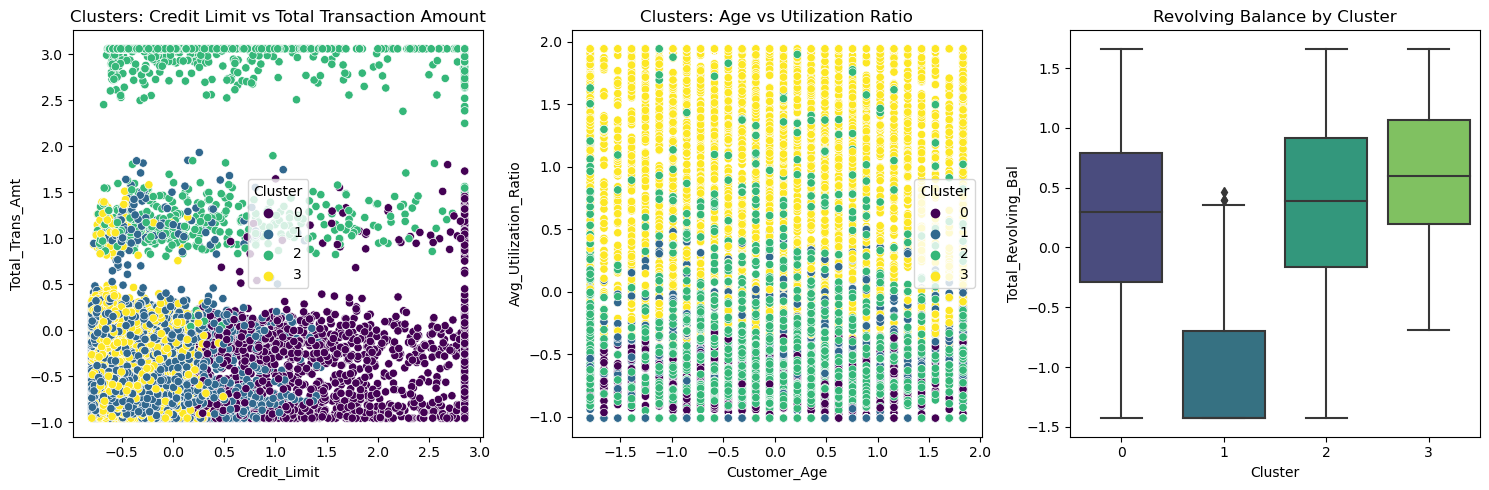

In [32]:
# Perform cluster analysis
analyze_clusters(df)

# Marketing insights

In [33]:
def generate_marketing_insights(df):
    cluster_insights = {}
    
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        
        insights = {
            'size': len(cluster_data),
            'avg_credit_limit': cluster_data['Credit_Limit'].mean(),
            'avg_transaction_amount': cluster_data['Total_Trans_Amt'].mean(),
            'avg_utilization_ratio': cluster_data['Avg_Utilization_Ratio'].mean(),
            'primary_income_group': cluster_data['Income_Category'].mode().values[0],
            'primary_education': cluster_data['Education_Level'].mode().values[0]
        }
        
        cluster_insights[cluster] = insights
    
    print("Marketing Cluster Insights:")
    for cluster, insights in cluster_insights.items():
        print(f"\nCluster {cluster}:")
        for key, value in insights.items():
            print(f"{key.replace('_', ' ').title()}: {value}")
    
    return cluster_insights

# Generate marketing insights
marketing_recommendations = generate_marketing_insights(df)

Marketing Cluster Insights:

Cluster 1:
Size: 3035
Avg Credit Limit: -0.3293404276390117
Avg Transaction Amount: -0.30263178721456396
Avg Utilization Ratio: -0.8265757489154384
Primary Income Group: 4
Primary Education: 2

Cluster 3:
Size: 4353
Avg Credit Limit: -0.5348328469890227
Avg Transaction Amount: -0.28348402314038235
Avg Utilization Ratio: 0.9495425977257178
Primary Income Group: 4
Primary Education: 2

Cluster 0:
Size: 1599
Avg Credit Limit: 1.6571476351938876
Avg Transaction Amount: -0.337620322607361
Avg Utilization Ratio: -0.7600173024969273
Primary Income Group: 3
Primary Education: 2

Cluster 2:
Size: 1140
Avg Credit Limit: 0.5946460632917497
Avg Transaction Amount: 2.361709055066175
Avg Utilization Ratio: -0.3591525116219579
Primary Income Group: 4
Primary Education: 2


# applying logistic regression and randomForest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve
)

In [35]:
features = [
    'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
    'Marital_Status', 'Income_Category', 'Card_Category', 
    'Months_on_book', 'Total_Relationship_Count', 
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

X = df[features]
y = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Model 2: SVC
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_predictions = svc_model.predict(X_test_scaled)

# fucntion for model evaluation

In [40]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression Model Performance:
Accuracy: 0.9042448173741362
Precision: 0.7805907172995781
Recall: 0.5657492354740061
F1 Score: 0.6560283687943262
ROC AUC Score: 0.7675714982549547


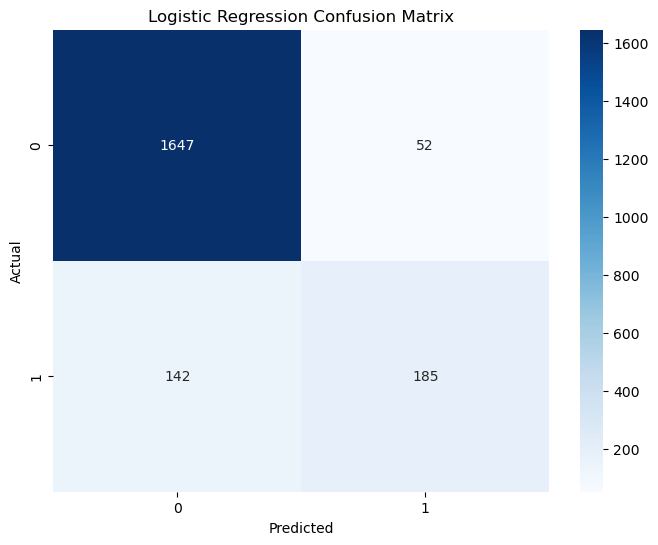


Random Forest Model Performance:
Accuracy: 0.9531095755182626
Precision: 0.9084507042253521
Recall: 0.7889908256880734
F1 Score: 0.8445171849427169
ROC AUC Score: 0.8868438531030127


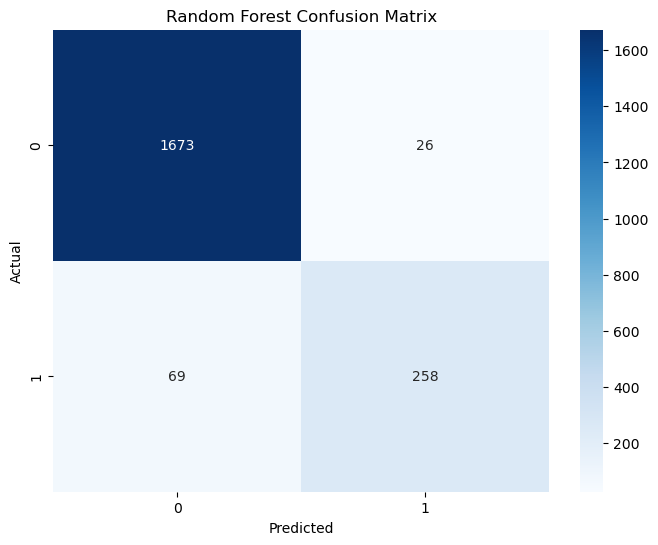


SVC Model Performance:
Accuracy: 0.9274432379072063
Precision: 0.8543307086614174
Recall: 0.6636085626911316
F1 Score: 0.7469879518072289
ROC AUC Score: 0.8209155232525698


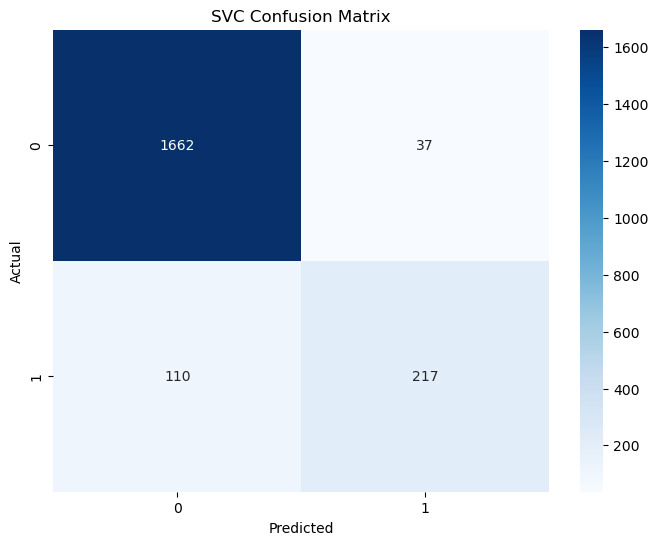

In [53]:
# Evaluate models
evaluate_model(y_test, lr_predictions, "Logistic Regression")
evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, svc_predictions, "SVC")

# Feature Importance (Random Forest)

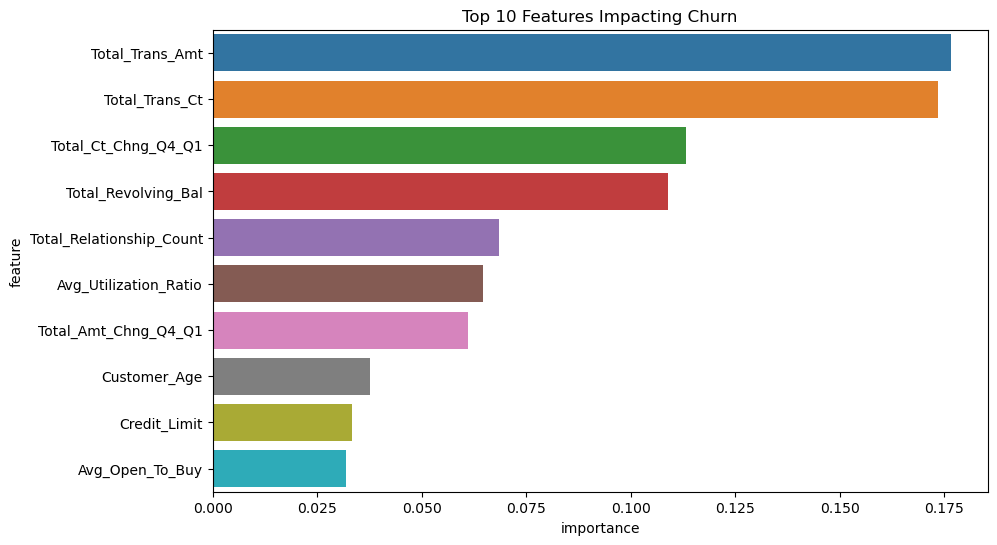

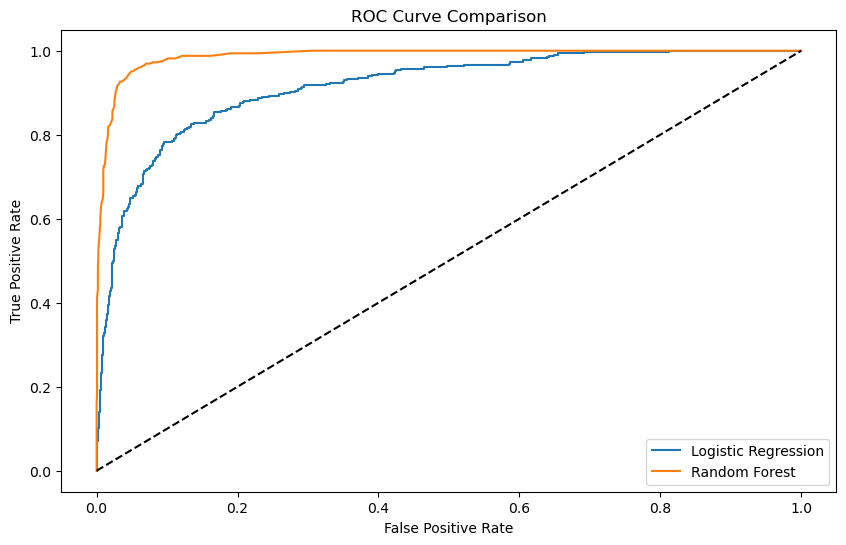

In [ ]:

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Impacting Churn')
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(10,6))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Hyperparameter tuning
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.1, 0.9)
}

# Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the model
rf_random.fit(X_train_scaled, y_train)

# Best model
best_rf = rf_random.best_estimator_
best_predictions = best_rf.predict(X_test_scaled)

In [56]:
best_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)


Cross validation for RF Model Performance:
Accuracy: 0.9570582428430404
Precision: 0.8947368421052632
Recall: 0.8318042813455657
F1 Score: 0.862123613312203
ROC AUC Score: 0.9064848363761377


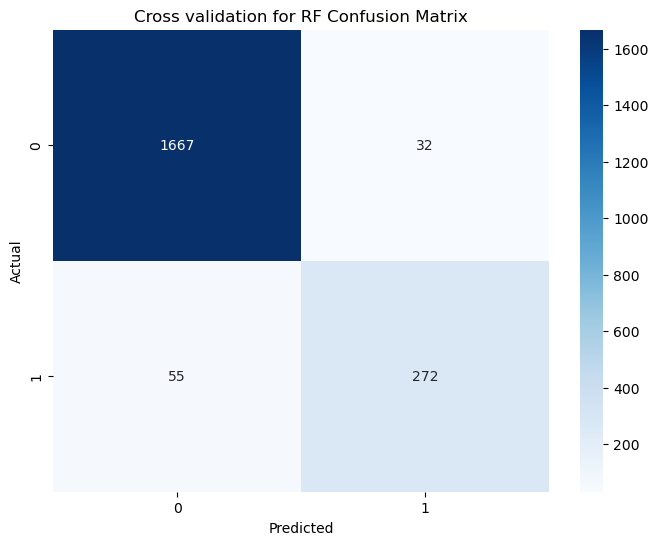

In [57]:
evaluate_model(y_test, best_predictions, "Cross validation for RF")